## import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
with open('Dataset/final_dataset.pickle', 'rb') as file:
    df = pickle.load(file)

df.head(2)

,Type,Municipality,NearStation,Price,FloorPlan,Area,LandShape,Frontage,BuildingYear,Structure,Use,Direction,Renovation
2,Residential Land(Land and Building),Chiyoda Ward,4.0,120000000,1K,65,Semi-rectangular Shaped,6.5,1970.0,S,House,South,Not yet
5,Residential Land(Land and Building),Chiyoda Ward,5.0,300000000,1K,210,Semi-rectangular Shaped,13.0,1982.0,RC,Other,Northeast,Not yet


<hr>

In this section, I’m going to see whether there is relationship between variables with price. Since the price is very crucial for each house, it makes sense that we see how many other factors are correlated to price. For doing this, we should consider two different ways. One way is correlation between numeric variables with price, and the second way is correlation between categorical variables with price. For the first one, we use Pearson correlation and for the second one, we use ANOVA test.

## 1 - Pearson Correlation

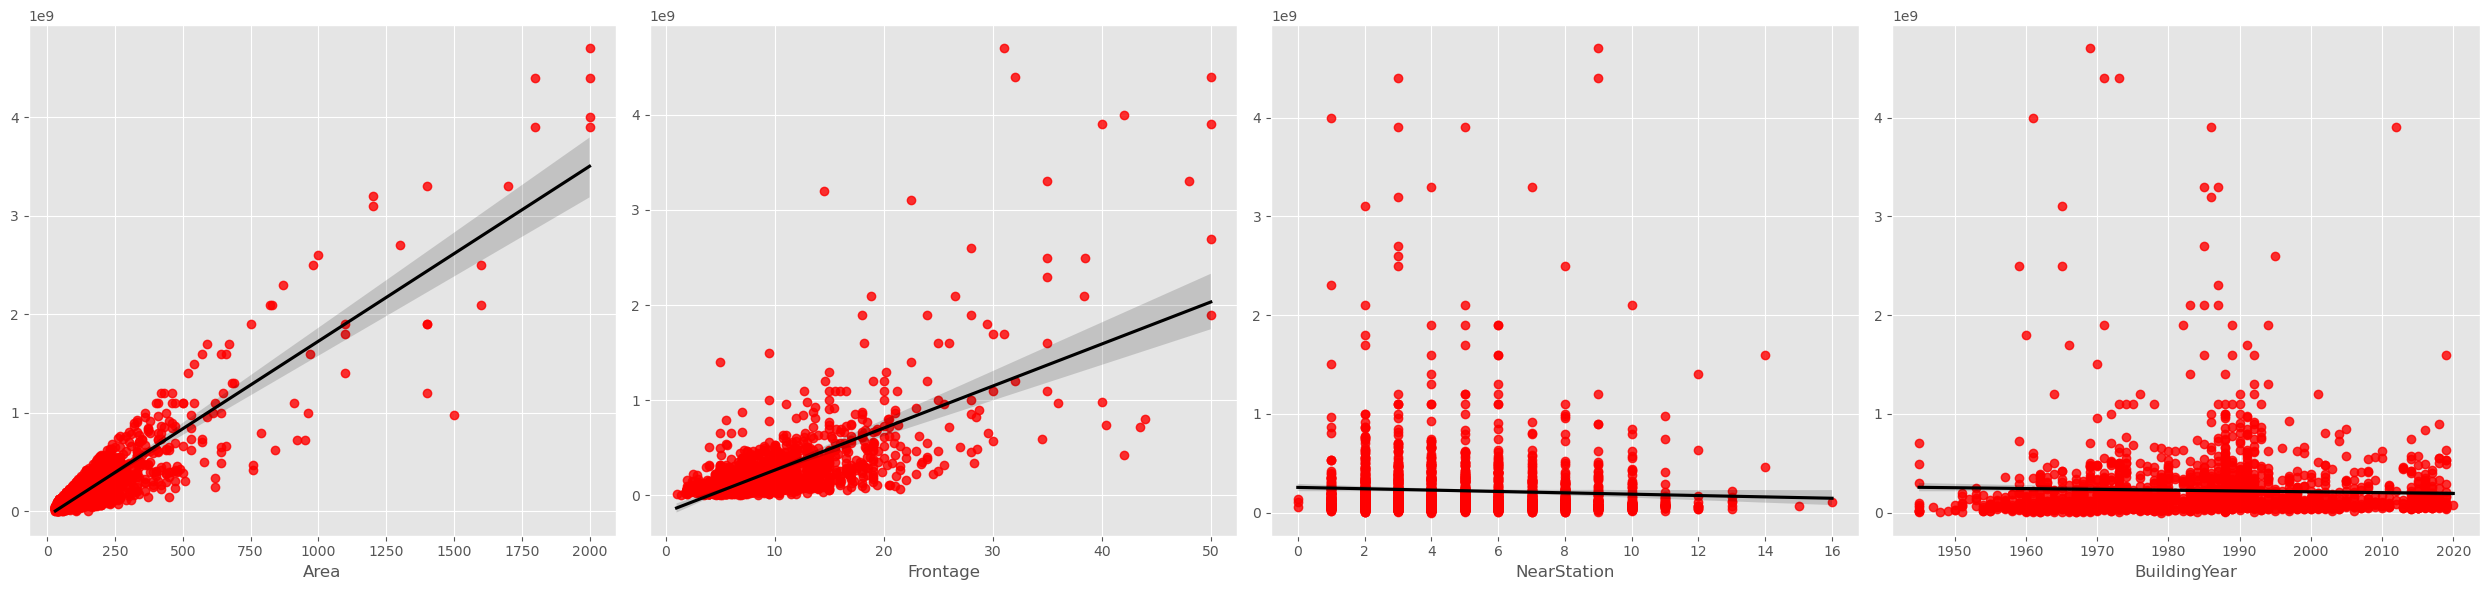

In [3]:
#declare numeric variable
numeric = ['Area','Frontage','NearStation','BuildingYear']

# Create a grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 6))

# Flatten the axes array to make it 1D
axes = axes.ravel()

# Loop through each subplot and plot sns.regplot
for i, col in enumerate(numeric):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i], scatter_kws={"color": "red"}, line_kws={"color":"black"})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The scatter plots show between price and area, price and frontage there is positive relationship. However, there is no relationship or too weak relationship between price with near station and price with building year.

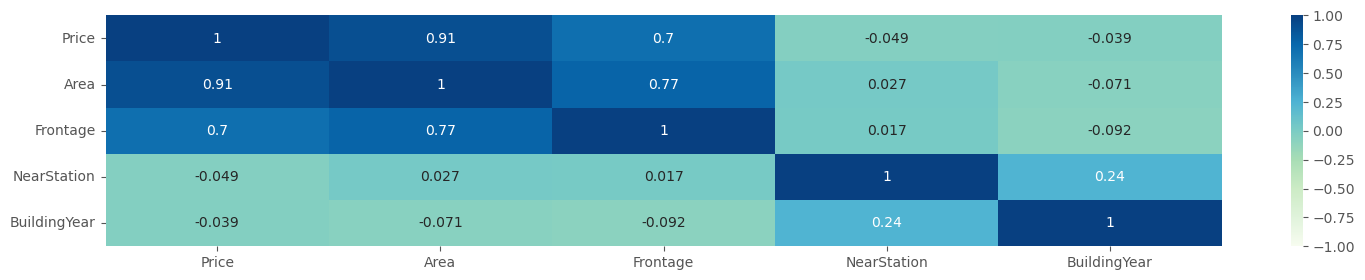

In [4]:
pearson_cor = df[['Price','Area','Frontage','NearStation','BuildingYear']].corr(method = 'pearson')

plt.figure(figsize = (18,3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

<hr>

## 2 - ANOVA Test

For categorical variables, first we should see whether a particular categorical variable impacts price or not (it is significant or not). For doing this, we run ANOVA test to compare the meaningful difference between means. After that, for the variables that are significant, we run pairwise descriptive analysis for all labels in the particular categorical variable and then compare their impacts on the price.

In [7]:
#we don't use renovation, FloorPlan, Type 
cat_list = ['Municipality', 'LandShape', 'Structure', 'Direction', 'Use']

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_list:
    formula = 'Price ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value for Price ~ {}: {}'.format(i , p_value))

P-value for Price ~ Municipality: 4.768022418933452e-15
P-value for Price ~ LandShape: 8.294356714399789e-12
P-value for Price ~ Structure: 5.944656853215865e-76
P-value for Price ~ Direction: 0.15767001811383244
P-value for Price ~ Use: 2.5848796769756257e-35


According to results, we can come up that all categorical variables are significant to explain the price of houses, because the p-value is less than 0.05 and we reject null hypothesis. So, in the next step, we want to see for each label in the above categorical variables, which of them has the most impact on price. Thus, I make s function to calculate the mean for each label in every single categorical variable (just the first 5 labels in terms of strength)

In [8]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)
    
    return mean_by.head(5)

In [9]:
mean_pairwise('Municipality')

,Price
Municipality,
Minato Ward,3.389058e+08
Chiyoda Ward,2.616271e+08
Chuo Ward,2.108704e+08
Bunkyo Ward,1.760597e+08
Shinjuku Ward,1.626113e+08


In [10]:
mean_pairwise('LandShape')

,Price
LandShape,
Irregular Shaped,3.729452e+08
Semi-shaped,3.002105e+08
Trapezoidal Shaped,2.892000e+08
Other LandShape,2.400000e+08
Semi-trapezoidal Shaped,2.102466e+08


In [11]:
mean_pairwise('Structure')

,Price
Structure,
SRC,5.727714e+08
RC,3.446573e+08
S,1.595189e+08
LS,1.251042e+08
W,8.165224e+07


In [12]:
mean_pairwise('Direction')

,Price
Direction,
Northwest,2.660004e+08
Southeast,2.356360e+08
West,2.290473e+08
Southwest,2.234823e+08
Northeast,2.200175e+08


In [13]:
mean_pairwise('Use')

,Price
Use,
Other,6.190909e+08
Warehouse,4.950833e+08
Parking Lot,3.866667e+08
Office,3.675639e+08
Housing Complex,2.846495e+08
